In [1]:
import pandas as pd 
import numpy as np
import random 

upper confidence bound in multi armed bandit 
action values 
q*(a)=e[Rt|At=a]
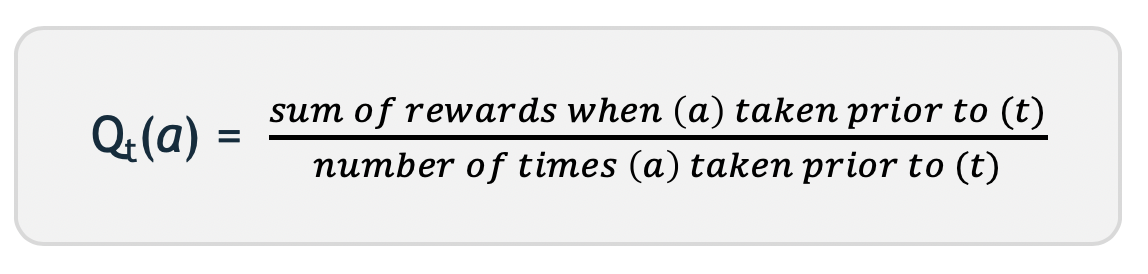

UCB allows to solve the confusion among the exploration and exploitation where an agent tries to choose both at same time 

basically an UCB selection uses uncertainity in the action value estimates for balancing exploration and exploitation. Since there is inherent uncertainty in the accuracy of the action-value estimates when we use a sampled set of rewards thus UCB uses uncertainty in the estimates to drive exploration.



In [35]:
import numpy as np

class UCB():
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)  # Number of times each arm has been played
        self.values = np.zeros(n_arms)  # Empirical mean reward for each arm

    def select_arm(self, round):
        ucb_val = np.zeros(self.n_arms)

        for i in range(self.n_arms):
            if self.counts[i] == 0:
                return i  # Play each arm at least once
            else:
                avg_reward = self.values[i]
                # Exploration term based on UCB1 formula
                confidence_bound = np.sqrt(2 * np.log(round) / self.counts[i])
                ucb_val[i] = avg_reward + confidence_bound

        return np.argmax(ucb_val)

    def update(self, selected_arm, reward):
        self.counts[selected_arm] += 1
        n = self.counts[selected_arm]
        val = self.values[selected_arm]
        # Incremental update of the mean reward
        self.values[selected_arm] = val + (reward - val) / n

def simulateUCB(n_rounds, true_probabilities):
    n_arms = len(true_probabilities)  # Number of slot machines (arms)
    bandit = UCB(n_arms)
    rewards = np.zeros(n_rounds)
    choices = np.zeros(n_rounds)

    for t in range(n_rounds):
        # Select an arm based on UCB values
        selected_arm = bandit.select_arm(t + 1)
        choices[t] = selected_arm

        # Simulate reward based on the true probability of the selected arm
        reward = np.random.binomial(1, true_probabilities[selected_arm])
        rewards[t] = reward

        # Update UCB model with observed reward
        bandit.update(selected_arm, reward)

    total_reward = np.sum(rewards)
    cumulative_rewards=np.cumsum(rewards)
    return total_reward, choices, rewards,cumulative_rewards

# Example usage
n_arms = 3
n_rounds = 100
true_probabilities = np.random.rand(n_arms)  # Generate random true probabilities for the arms
total_reward, choices, rewards,cumulative_rewards = simulateUCB(n_rounds, true_probabilities)

print(f"Total Reward: {total_reward}")
print(f"Choices made: {choices}")
print(f"Rewards obtained: {rewards}")


Total Reward: 81.0
Choices made: [0. 1. 2. 0. 1. 2. 0. 0. 0. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 0. 1. 0. 1. 1.
 2. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 2. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 2. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 2. 2. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 1. 1. 1. 1.
 1. 1. 1. 1.]
Rewards obtained: [1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 0.]


In [36]:
import matplotlib.pyplot as plt

def plot_results(n_rounds, true_probabilities, choices, cumulative_rewards):
    n_arms = len(true_probabilities)
    rounds = np.arange(1, n_rounds + 1)

    # Plot cumulative rewards
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(rounds, cumulative_rewards, label='Cumulative Rewards', color='b')
    plt.xlabel('Rounds')
    plt.ylabel('Cumulative Rewards')
    plt.title('Cumulative Rewards Over Time')
    plt.grid(True)

    # Plot arm selection
    plt.subplot(2, 1, 2)
    for arm in range(n_arms):
        arm_selected = (choices == arm).astype(int)
        plt.plot(rounds, np.cumsum(arm_selected), label=f'Arm {arm+1}')
    
    plt.xlabel('Rounds')
    plt.ylabel('Times Each Arm Was Selected')
    plt.title('Arm Selection Over Time')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


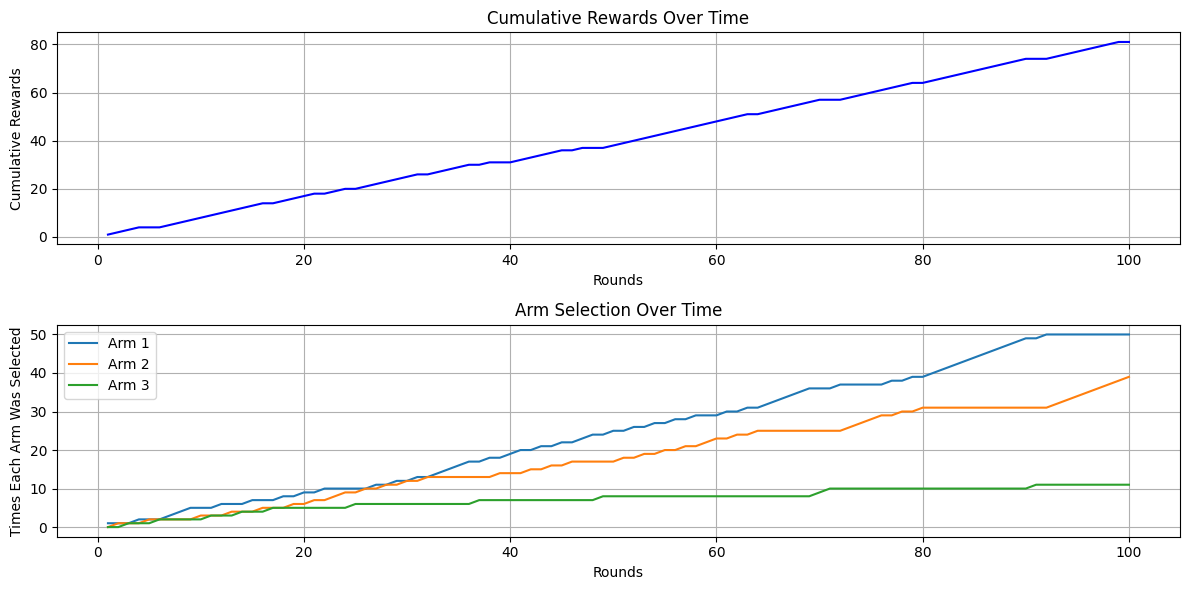

In [37]:
# Plot the results
plot_results(n_rounds, true_probabilities, choices, cumulative_rewards)